<a href="https://colab.research.google.com/github/Starboy998/IDS-Saude/blob/C%C3%B3digos/Analise_Saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import time
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn
import requests
from bs4 import BeautifulSoup

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%config InlineBeckend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Starboy998/IDS-Saude/Dados/Cons_Saude_Mun.csv', sep=';', encoding='utf-8')

In [ ]:
df.shape

(5570, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CD_MUN      5570 non-null   int64  
 1   MUN         5570 non-null   object 
 2   AR_TER_km2  5570 non-null   float64
 3   POP_EST     5570 non-null   int64  
 4   DENS_DEM    5570 non-null   float64
 5   ESC         5570 non-null   float64
 6   IDHM        5570 non-null   float64
 7   MORT_INF    5570 non-null   float64
 8   PIB_P_CAP   5570 non-null   float64
 9   MD_CIR_G    5570 non-null   float64
 10  MD_CLIN     5570 non-null   float64
 11  MD_GIN_OBS  5570 non-null   float64
 12  MD_FAM      5570 non-null   float64
 13  MD_PED      5570 non-null   float64
 14  MD_GERI     5570 non-null   float64
 15  MD_URO      5570 non-null   float64
 16  AS_SOC      5570 non-null   float64
 17  ENF         5570 non-null   float64
 18  FISIO       5570 non-null   float64
 19  FONO        5570 non-null  

In [ ]:
df['CD_MUN'] = df['CD_MUN'].astype(object)
df['POP_EST'] = df['POP_EST'].astype(float)

In [ ]:
df.head()

CD_MUN                    MUN  AR_TER_km2   POP_EST  DENS_DEM   ESC  \
0  1100015  Alta Floresta D'Oeste    7067.127   22516.0      3.45  95.7   
1  1100023              Ariquemes    4426.571  111148.0     20.41  97.2   
2  1100031                 Cabixi    1314.352    5067.0      4.80  98.1   
3  1100049                 Cacoal    3793.000   86416.0     20.72  97.6   
4  1100056             Cerejeiras    2783.300   16088.0      6.12  98.5   

     IDHM  MORT_INF  PIB_P_CAP  MD_CIR_G  ...  ODONTO  PSICO  PSIQ  POSTO  \
0  641.00      8.17   21552.47       1.0  ...     7.0    1.0   1.0    6.0   
1  702.00     10.41   23206.36       7.0  ...    12.0   25.0   1.0    0.0   
2    0.65     25.00   25837.12       0.0  ...     1.0    1.0   0.0    0.0   
3  718.00      5.09   25708.96       6.0  ...   128.0   45.0   6.0    1.0   
4  692.00     16.88   28714.35       0.0  ...     8.0    2.0   0.0    2.0   

   CS_UBS  POLICL  HOSP_GER  HOSP_ESP  PRT_SOC  PRT_ESP  
0     4.0     0.0       2.0       0.0      0.0      0.0  
1    13.0     1.0      10.0       1.0      0.0      0.0  
2     2.0     0.0       0.0       0.0      0.0      0.0  
3    11.0     5.0       8.0       0.0      1.0      0.0  
4     4.0     0.0       1.0       0.0      0.0      0.0  

[5 rows x 31 columns]

In [ ]:
pd.set_option('float_format', '{:.3f}'.format)
df.describe().T

count       mean        std      min      25%        50%  \
AR_TER_km2 5570.000 242470.196 258410.737   26.100 3715.945 170743.000   
POP_EST    5570.000  38297.601 224288.153  771.000 5454.000  11732.000   
DENS_DEM   5570.000    108.246    571.862    0.130   11.570     24.400   
ESC        5570.000     97.138      2.665   51.800   96.600     97.600   
IDHM       5570.000    591.770    210.379    0.450  579.000    651.000   
MORT_INF   5570.000     19.030     10.862    1.960   11.242     18.085   
PIB_P_CAP  5570.000  23513.942  24238.463 4788.180 9880.370  17433.840   
MD_CIR_G   5570.000      1.833     20.493    0.000    0.000      0.000   
MD_CLIN    5570.000     25.862    187.253    0.000    1.000      3.000   
MD_GIN_OBS 5570.000      4.192     43.657    0.000    0.000      0.000   
MD_FAM     5570.000      0.195      2.860    0.000    0.000      0.000   
MD_PED     5570.000      7.449     69.966    0.000    0.000      0.000   
MD_GERI    5570.000      0.167      2.938    0.000    0.000      0.000   
MD_URO     5570.000      0.461      5.777    0.000    0.000      0.000   
AS_SOC     5570.000      6.811     46.036    0.000    1.000      1.000   
ENF        5570.000     49.072    457.626    0.000    3.000      7.000   
FISIO      5570.000     17.921    129.449    0.000    2.000      3.000   
FONO       5570.000      4.472     32.185    0.000    0.000      1.000   
NUTRI      5570.000      6.647     52.323    0.000    1.000      1.000   
ODONTO     5570.000     16.085     97.454    0.000    1.000      2.000   
PSICO      5570.000     13.481     85.028    0.000    1.000      2.000   
PSIQ       5570.000      1.699     20.265    0.000    0.000      0.000   
POSTO      5570.000      1.583      3.120    0.000    0.000      0.000   
CS_UBS     5570.000      7.100     13.366    0.000    2.000      4.000   
POLICL     5570.000      1.876     14.963    0.000    0.000      0.000   
HOSP_GER   5570.000      0.971      3.416    0.000    0.000      1.000   
HOSP_ESP   5570.000      0.180      1.958    0.000    0.000      0.000   
PRT_SOC    5570.000      0.055      0.364    0.000    0.000      0.000   
PRT_ESP    5570.000      0.014      0.174    0.000    0.000      0.000   

                  75%          max  
AR_TER_km2 379095.000   999517.000  
POP_EST     25764.750 12396372.000  
DENS_DEM       51.835    13024.560  
ESC            98.500      100.000  
IDHM          712.000      862.000  
MORT_INF       24.365      181.820  
PIB_P_CAP   28729.907   583171.850  
MD_CIR_G        0.000     1067.000  
MD_CLIN        10.000     9833.000  
MD_GIN_OBS      1.000     2355.000  
MD_FAM          0.000      142.000  
MD_PED          1.000     3550.000  
MD_GERI         0.000      185.000  
MD_URO          0.000      325.000  
AS_SOC          3.000     2302.000  
ENF            17.000    25044.000  
FISIO           8.000     6874.000  
FONO            2.000     1593.000  
NUTRI           3.000     2484.000  
ODONTO          7.000     4384.000  
PSICO           6.000     4102.000  
PSIQ            1.000     1200.000  
POSTO           2.000       78.000  
CS_UBS          8.000      522.000  
POLICL          1.000      581.000  
HOSP_GER        1.000      157.000  
HOSP_ESP        0.000       69.000  
PRT_SOC         0.000       15.000  
PRT_ESP         0.000        6.000

In [ ]:
pd.set_option('float_format', '{:.3f}'.format)
df.median()

CD_MUN       3146280.000
AR_TER_km2    170743.000
POP_EST        11732.000
DENS_DEM          24.400
ESC               97.600
IDHM             651.000
MORT_INF          18.085
PIB_P_CAP      17433.840
MD_CIR_G           0.000
MD_CLIN            3.000
MD_GIN_OBS         0.000
MD_FAM             0.000
MD_PED             0.000
MD_GERI            0.000
MD_URO             0.000
AS_SOC             1.000
ENF                7.000
FISIO              3.000
FONO               1.000
NUTRI              1.000
ODONTO             2.000
PSICO              2.000
PSIQ               0.000
POSTO              0.000
CS_UBS             4.000
POLICL             0.000
HOSP_GER           1.000
HOSP_ESP           0.000
PRT_SOC            0.000
PRT_ESP            0.000
dtype: float64

In [ ]:
pd.set_option('float_format', '{:.3f}'.format)
df.var()

CD_MUN       970048376717.708
AR_TER_km2    66776108817.798
POP_EST       50305175490.645
DENS_DEM           327026.079
ESC                     7.100
IDHM                44259.306
MORT_INF              117.975
PIB_P_CAP       587503092.514
MD_CIR_G              419.980
MD_CLIN             35063.829
MD_GIN_OBS           1905.919
MD_FAM                  8.181
MD_PED               4895.233
MD_GERI                 8.631
MD_URO                 33.370
AS_SOC               2119.349
ENF                209421.829
FISIO               16757.021
FONO                 1035.882
NUTRI                2737.673
ODONTO               9497.258
PSICO                7229.752
PSIQ                  410.652
POSTO                   9.734
CS_UBS                178.650
POLICL                223.882
HOSP_GER               11.670
HOSP_ESP                3.834
PRT_SOC                 0.133
PRT_ESP                 0.030
dtype: float64

In [ ]:
cols = ['POP_EST', 'ESC', 'MORT_INF', 'PIB_P_CAP']

In [ ]:
df[cols].head()

POP_EST    ESC  MORT_INF  PIB_P_CAP
0  22516.000 95.700     8.170  21552.470
1 111148.000 97.200    10.410  23206.360
2   5067.000 98.100    25.000  25837.120
3  86416.000 97.600     5.090  25708.960
4  16088.000 98.500    16.880  28714.350

In [ ]:
df[cols].corr()

POP_EST    ESC  MORT_INF  PIB_P_CAP
POP_EST      1.000 -0.021    -0.092      0.072
ESC         -0.021  1.000     0.018      0.112
MORT_INF    -0.092  0.018     1.000     -0.057
PIB_P_CAP    0.072  0.112    -0.057      1.000

In [ ]:
# Set up plotting environment

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting plot appearance
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CD_MUN      5570 non-null   object 
 1   MUN         5570 non-null   object 
 2   AR_TER_km2  5570 non-null   float64
 3   POP_EST     5570 non-null   float64
 4   DENS_DEM    5570 non-null   float64
 5   ESC         5570 non-null   float64
 6   IDHM        5570 non-null   float64
 7   MORT_INF    5570 non-null   float64
 8   PIB_P_CAP   5570 non-null   float64
 9   MD_CIR_G    5570 non-null   float64
 10  MD_CLIN     5570 non-null   float64
 11  MD_GIN_OBS  5570 non-null   float64
 12  MD_FAM      5570 non-null   float64
 13  MD_PED      5570 non-null   float64
 14  MD_GERI     5570 non-null   float64
 15  MD_URO      5570 non-null   float64
 16  AS_SOC      5570 non-null   float64
 17  ENF         5570 non-null   float64
 18  FISIO       5570 non-null   float64
 19  FONO        5570 non-null  

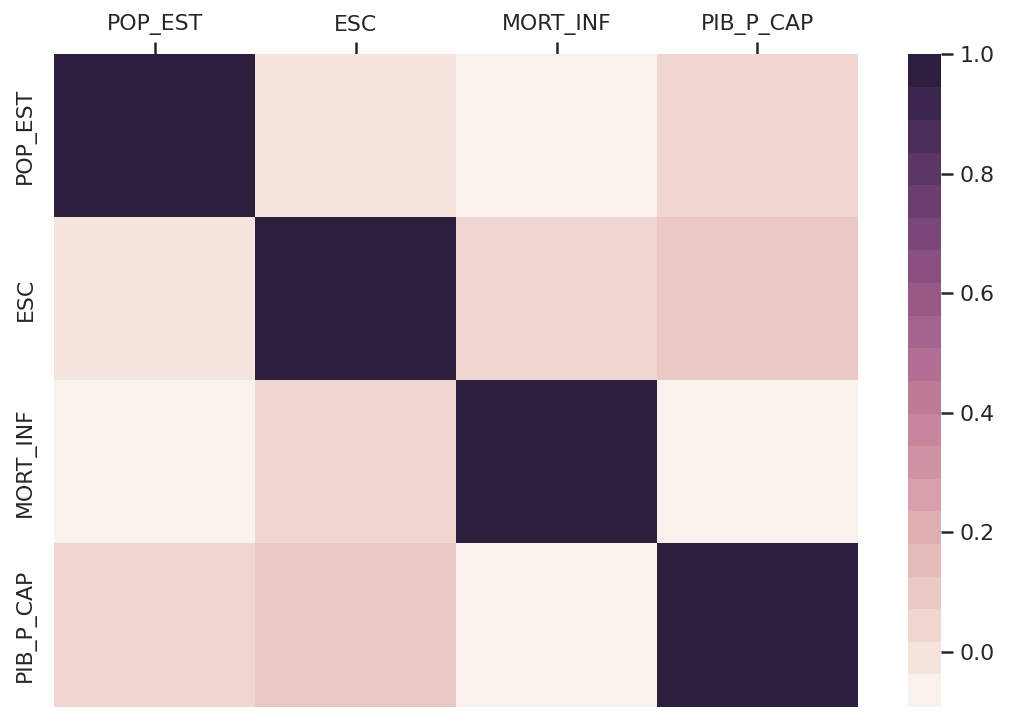

In [ ]:
tax = sns.heatmap(df[cols].corr(),
                 cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
tax.xaxis.tick_top() # move labels to the top

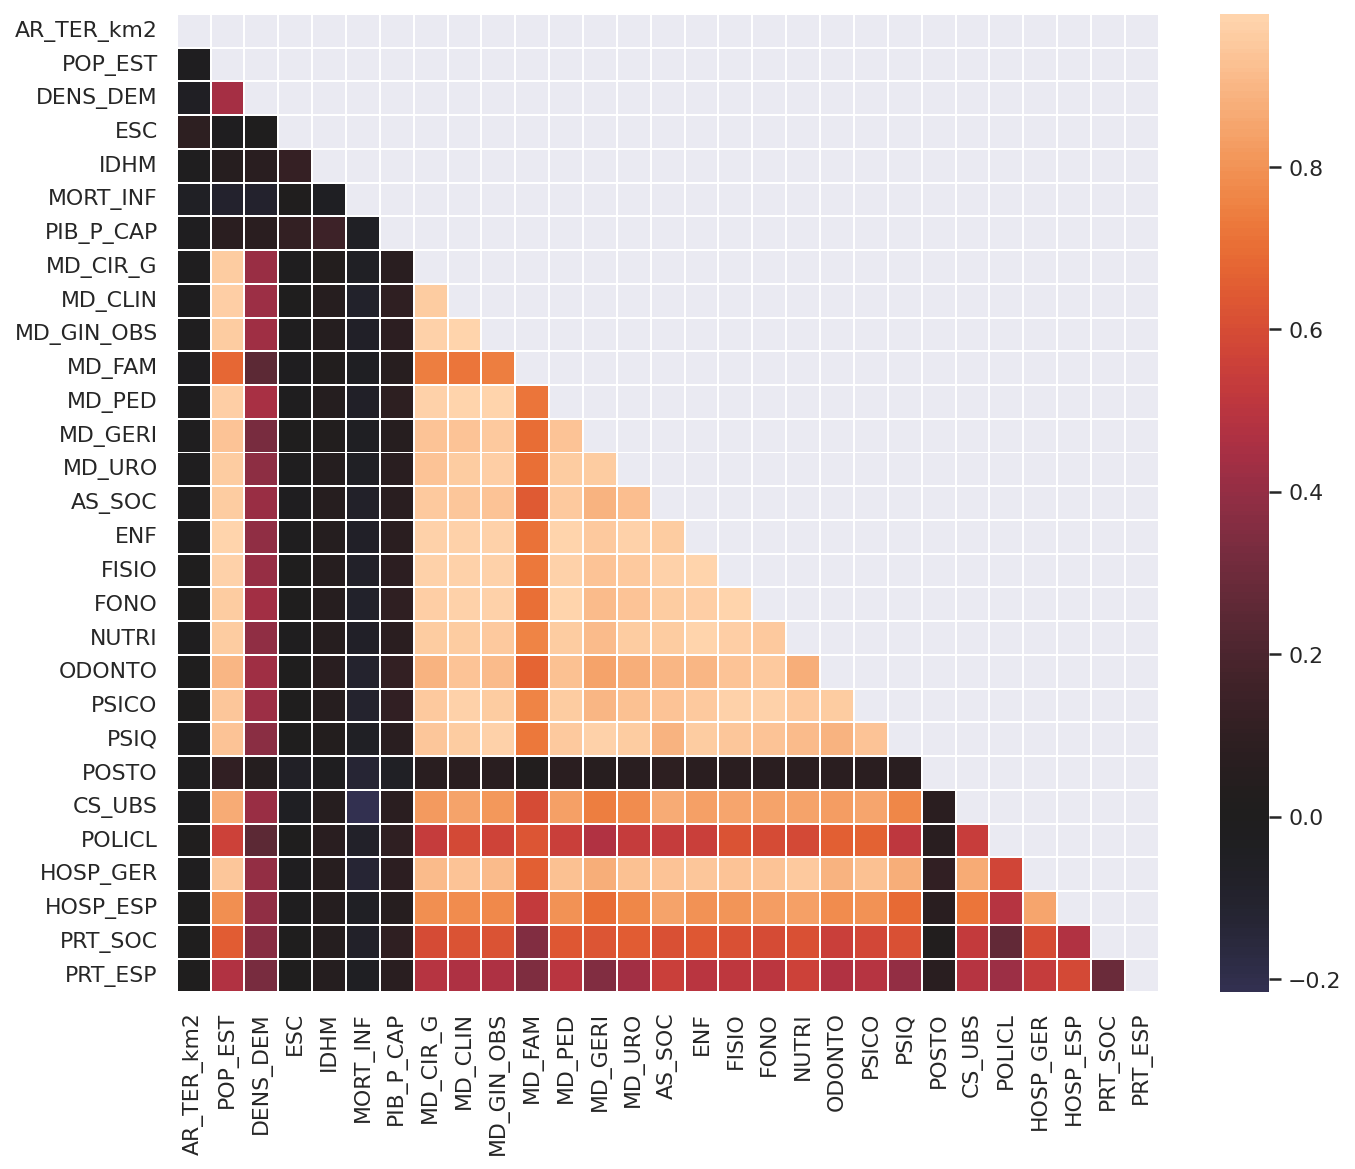

In [ ]:
# computando a matrix de correlação das variaveis (todas por todas)
corr = df.corr()

# retirando o triangulo superior da matrix (ele é espelhado a parte inferior)
mask = np.triu(np.ones_like(corr, dtype= bool))
f, ax = plt.subplots(figsize=(11, 9))

# gerando a matrix
sns.heatmap(corr, mask= mask, center= 0, linewidth= 0.5);

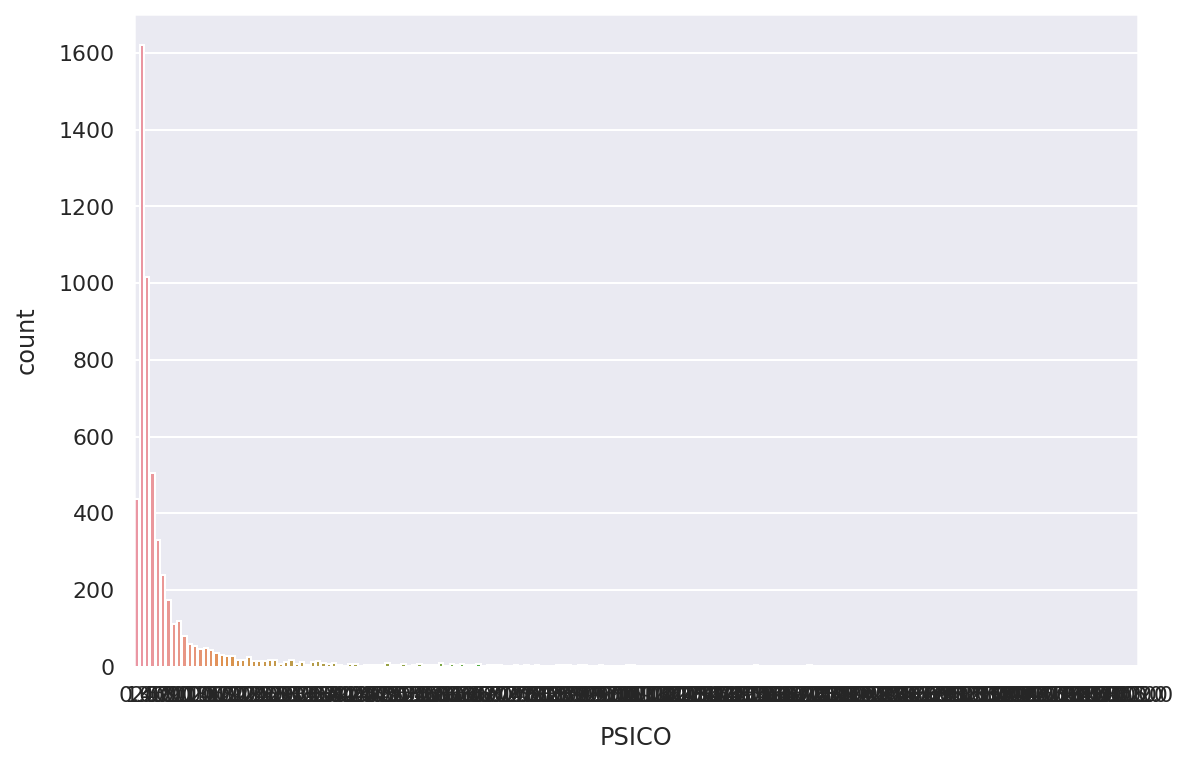

In [ ]:
sns.countplot(data=df,x='PSICO');

In [ ]:
df

CD_MUN                    MUN  AR_TER_km2     POP_EST  DENS_DEM    ESC  \
0     1100015  Alta Floresta D'Oeste    7067.127   22516.000     3.450 95.700   
1     1100023              Ariquemes    4426.571  111148.000    20.410 97.200   
2     1100031                 Cabixi    1314.352    5067.000     4.800 98.100   
3     1100049                 Cacoal    3793.000   86416.000    20.720 97.600   
4     1100056             Cerejeiras    2783.300   16088.000     6.120 98.500   
...       ...                    ...         ...         ...       ...    ...   
5565  5222005             Vianópolis  954284.000   14088.000    13.150 98.600   
5566  5222054         Vicentinópolis  737255.000    9002.000    10.000 99.100   
5567  5222203               Vila Boa    1060.172    6451.000     4.470 96.000   
5568  5222302          Vila Propício    2181.583    5941.000     2.360 96.900   
5569  5300108               Brasília    5760.784 3094325.000   444.660 97.500   

        IDHM  MORT_INF  PIB_P_CAP  MD_CIR_G  ...   ODONTO    PSICO    PSIQ  \
0    641.000     8.170  21552.470     1.000  ...    7.000    1.000   1.000   
1    702.000    10.410  23206.360     7.000  ...   12.000   25.000   1.000   
2      0.650    25.000  25837.120     0.000  ...    1.000    1.000   0.000   
3    718.000     5.090  25708.960     6.000  ...  128.000   45.000   6.000   
4    692.000    16.880  28714.350     0.000  ...    8.000    2.000   0.000   
...      ...       ...        ...       ...  ...      ...      ...     ...   
5565 712.000     5.100  32025.460     0.000  ...    2.000    4.000   0.000   
5566 684.000    26.790  37435.760     0.000  ...    1.000    1.000   0.000   
5567 647.000    20.000  17160.330     0.000  ...    0.000    1.000   0.000   
5568 634.000    56.340  28444.320     0.000  ...    0.000    0.000   0.000   
5569 824.000     8.530  85661.390   396.000  ... 1115.000 1732.000 249.000   

      POSTO  CS_UBS  POLICL  HOSP_GER  HOSP_ESP  PRT_SOC  PRT_ESP  
0     6.000   4.000   0.000     2.000     0.000    0.000    0.000  
1     0.000  13.000   1.000    10.000     1.000    0.000    0.000  
2     0.000   2.000   0.000     0.000     0.000    0.000    0.000  
3     1.000  11.000   5.000     8.000     0.000    1.000    0.000  
4     2.000   4.000   0.000     1.000     0.000    0.000    0.000  
...     ...     ...     ...       ...       ...      ...      ...  
5565  0.000   5.000   0.000     1.000     0.000    0.000    0.000  
5566  0.000   5.000   0.000     1.000     0.000    0.000    0.000  
5567  0.000   2.000   0.000     1.000     0.000    0.000    0.000  
5568  0.000   2.000   0.000     0.000     0.000    0.000    0.000  
5569  2.000 178.000 581.000    47.000    22.000    0.000    1.000  

[5570 rows x 31 columns]

In [ ]:
print(df.columns.tolist(
))

['CD_MUN', 'MUN', 'AR_TER_km2', 'POP_EST', 'DENS_DEM', 'ESC', 'IDHM', 'MORT_INF', 'PIB_P_CAP', 'MD_CIR_G', 'MD_CLIN', 'MD_GIN_OBS', 'MD_FAM', 'MD_PED', 'MD_GERI', 'MD_URO', 'AS_SOC', 'ENF', 'FISIO', 'FONO', 'NUTRI', 'ODONTO', 'PSICO', 'PSIQ', 'POSTO', 'CS_UBS', 'POLICL', 'HOSP_GER', 'HOSP_ESP', 'PRT_SOC', 'PRT_ESP']


In [ ]:
#Lista de Colunas que estão correlacionados (maior ou = 0,5)
cols=['CD_MUN', 'MUN',  'POP_EST', 'MD_CIR_G', 'MD_CLIN', 'MD_GIN_OBS', 'MD_FAM', 
      'MD_PED', 'MD_GERI', 'MD_URO', 'AS_SOC', 'ENF', 'FISIO', 'FONO', 'NUTRI', 'ODONTO', 'PSICO', 'PSIQ', 
     'CS_UBS', 'POLICL', 'HOSP_GER', 'HOSP_ESP',
      'PRT_SOC', 'PRT_ESP']

pop_est=['CD_MUN', 'MUN',  'POP_EST', 'MD_CIR_G', 'MD_CLIN', 'MD_GIN_OBS', 'MD_FAM', 
      'MD_PED', 'MD_GERI', 'MD_URO', 'AS_SOC', 'ENF', 'FISIO', 'FONO', 'NUTRI', 'ODONTO', 'PSICO', 'PSIQ', 
     'CS_UBS', 'POLICL', 'HOSP_GER', 'HOSP_ESP',
      'PRT_SOC', 'PRT_ESP']

In [ ]:
sns.pairplot(df[cols],
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30});

In [ ]:
df.describe()

AR_TER_km2      POP_EST  DENS_DEM      ESC     IDHM  MORT_INF  \
count    5570.000     5570.000  5570.000 5570.000 5570.000  5570.000   
mean   242470.196    38297.601   108.246   97.138  591.770    19.030   
std    258410.737   224288.153   571.862    2.665  210.379    10.862   
min        26.100      771.000     0.130   51.800    0.450     1.960   
25%      3715.945     5454.000    11.570   96.600  579.000    11.242   
50%    170743.000    11732.000    24.400   97.600  651.000    18.085   
75%    379095.000    25764.750    51.835   98.500  712.000    24.365   
max    999517.000 12396372.000 13024.560  100.000  862.000   181.820   

       PIB_P_CAP  MD_CIR_G  MD_CLIN  MD_GIN_OBS  ...   ODONTO    PSICO  \
count   5570.000  5570.000 5570.000    5570.000  ... 5570.000 5570.000   
mean   23513.942     1.833   25.862       4.192  ...   16.085   13.481   
std    24238.463    20.493  187.253      43.657  ...   97.454   85.028   
min     4788.180     0.000    0.000       0.000  ...    0.000    0.000   
25%     9880.370     0.000    1.000       0.000  ...    1.000    1.000   
50%    17433.840     0.000    3.000       0.000  ...    2.000    2.000   
75%    28729.907     0.000   10.000       1.000  ...    7.000    6.000   
max   583171.850  1067.000 9833.000    2355.000  ... 4384.000 4102.000   

          PSIQ    POSTO   CS_UBS   POLICL  HOSP_GER  HOSP_ESP  PRT_SOC  \
count 5570.000 5570.000 5570.000 5570.000  5570.000  5570.000 5570.000   
mean     1.699    1.583    7.100    1.876     0.971     0.180    0.055   
std     20.265    3.120   13.366   14.963     3.416     1.958    0.364   
min      0.000    0.000    0.000    0.000     0.000     0.000    0.000   
25%      0.000    0.000    2.000    0.000     0.000     0.000    0.000   
50%      0.000    0.000    4.000    0.000     1.000     0.000    0.000   
75%      1.000    2.000    8.000    1.000     1.000     0.000    0.000   
max   1200.000   78.000  522.000  581.000   157.000    69.000   15.000   

       PRT_ESP  
count 5570.000  
mean     0.014  
std      0.174  
min      0.000  
25%      0.000  
50%      0.000  
75%      0.000  
max      6.000  

[8 rows x 29 columns]

In [ ]:
# Criando um novo data frame para feature engineering para criar colunas novas
df1=df.drop(labels=['CD_MUN', 'MUN'], axis=1)

In [ ]:
# Primeira linha é para olhar todas as colunas que existe no data frame
pd.set_option('display.max_columns', None) 
# Estatisticas Básicas
df1.describe()

AR_TER_km2      POP_EST  DENS_DEM      ESC     IDHM  MORT_INF  \
count    5570.000     5570.000  5570.000 5570.000 5570.000  5570.000   
mean   242470.196    38297.601   108.246   97.138  591.770    19.030   
std    258410.737   224288.153   571.862    2.665  210.379    10.862   
min        26.100      771.000     0.130   51.800    0.450     1.960   
25%      3715.945     5454.000    11.570   96.600  579.000    11.242   
50%    170743.000    11732.000    24.400   97.600  651.000    18.085   
75%    379095.000    25764.750    51.835   98.500  712.000    24.365   
max    999517.000 12396372.000 13024.560  100.000  862.000   181.820   

       PIB_P_CAP  MD_CIR_G  MD_CLIN  MD_GIN_OBS   MD_FAM   MD_PED  MD_GERI  \
count   5570.000  5570.000 5570.000    5570.000 5570.000 5570.000 5570.000   
mean   23513.942     1.833   25.862       4.192    0.195    7.449    0.167   
std    24238.463    20.493  187.253      43.657    2.860   69.966    2.938   
min     4788.180     0.000    0.000       0.000    0.000    0.000    0.000   
25%     9880.370     0.000    1.000       0.000    0.000    0.000    0.000   
50%    17433.840     0.000    3.000       0.000    0.000    0.000    0.000   
75%    28729.907     0.000   10.000       1.000    0.000    1.000    0.000   
max   583171.850  1067.000 9833.000    2355.000  142.000 3550.000  185.000   

        MD_URO   AS_SOC       ENF    FISIO     FONO    NUTRI   ODONTO  \
count 5570.000 5570.000  5570.000 5570.000 5570.000 5570.000 5570.000   
mean     0.461    6.811    49.072   17.921    4.472    6.647   16.085   
std      5.777   46.036   457.626  129.449   32.185   52.323   97.454   
min      0.000    0.000     0.000    0.000    0.000    0.000    0.000   
25%      0.000    1.000     3.000    2.000    0.000    1.000    1.000   
50%      0.000    1.000     7.000    3.000    1.000    1.000    2.000   
75%      0.000    3.000    17.000    8.000    2.000    3.000    7.000   
max    325.000 2302.000 25044.000 6874.000 1593.000 2484.000 4384.000   

         PSICO     PSIQ    POSTO   CS_UBS   POLICL  HOSP_GER  HOSP_ESP  \
count 5570.000 5570.000 5570.000 5570.000 5570.000  5570.000  5570.000   
mean    13.481    1.699    1.583    7.100    1.876     0.971     0.180   
std     85.028   20.265    3.120   13.366   14.963     3.416     1.958   
min      0.000    0.000    0.000    0.000    0.000     0.000     0.000   
25%      1.000    0.000    0.000    2.000    0.000     0.000     0.000   
50%      2.000    0.000    0.000    4.000    0.000     1.000     0.000   
75%      6.000    1.000    2.000    8.000    1.000     1.000     0.000   
max   4102.000 1200.000   78.000  522.000  581.000   157.000    69.000   

       PRT_SOC  PRT_ESP  
count 5570.000 5570.000  
mean     0.055    0.014  
std      0.364    0.174  
min      0.000    0.000  
25%      0.000    0.000  
50%      0.000    0.000  
75%      0.000    0.000  
max     15.000    6.000

In [ ]:
# feature Engineering = trocamos os valores absoluto das linhas por intervalos para facilitar a visualização
df1['PSICO'] = pd.cut(df1['PSICO'], bins=[0,5,10,50,100,500,5000])
df1['ODONTO'] = pd.cut(df1['ODONTO'], bins=[0,5,10,50,100,500,5000])
df1['MD_CIR_G'] = pd.cut(df1['MD_CIR_G'], bins=[0,5,10,50,100,500,5000])
df1['MD_GIN_OBS'] = pd.cut(df1['MD_GIN_OBS'], bins=[0,5,10,50,100,500,5000])
df1['MD_FAM'] = pd.cut(df1['MD_FAM'], bins=[0,5,10,50,100,500,5000])
df1['MD_PED'] = pd.cut(df1['MD_PED'], bins=[0,5,10,50,100,500,5000])
df1['MD_GERI'] = pd.cut(df1['MD_GERI'], bins=[0,5,10,50,100,500,5000])
df1['MD_URO'] = pd.cut(df1['MD_URO'], bins=[0,5,10,50,100,500,5000])
df1['AS_SOC'] = pd.cut(df1['AS_SOC'], bins=[0,5,10,50,100,500,5000])
df1['FONO'] = pd.cut(df1['FONO'], bins=[0,5,10,50,100,500,5000])
df1['NUTRI'] = pd.cut(df1['NUTRI'], bins=[0,5,10,50,100,500,5000])
df1['PSIQ'] = pd.cut(df1['PSIQ'], bins=[0,5,10,50,100,500,5000])
df1['FISIO'] = pd.cut(df1['FISIO'], bins=[0,5,10,50,100,500,5000,6000,7000])
df1['ENF'] = pd.cut(df1['ENF'], bins=[0,5,10,50,100,500,5000,10000,15000,20000,30000])
df1['POP_EST'] = pd.cut(df1['POP_EST'], bins=[0,5000,10000,50000,100000,200000,500000,1000000,15000000])

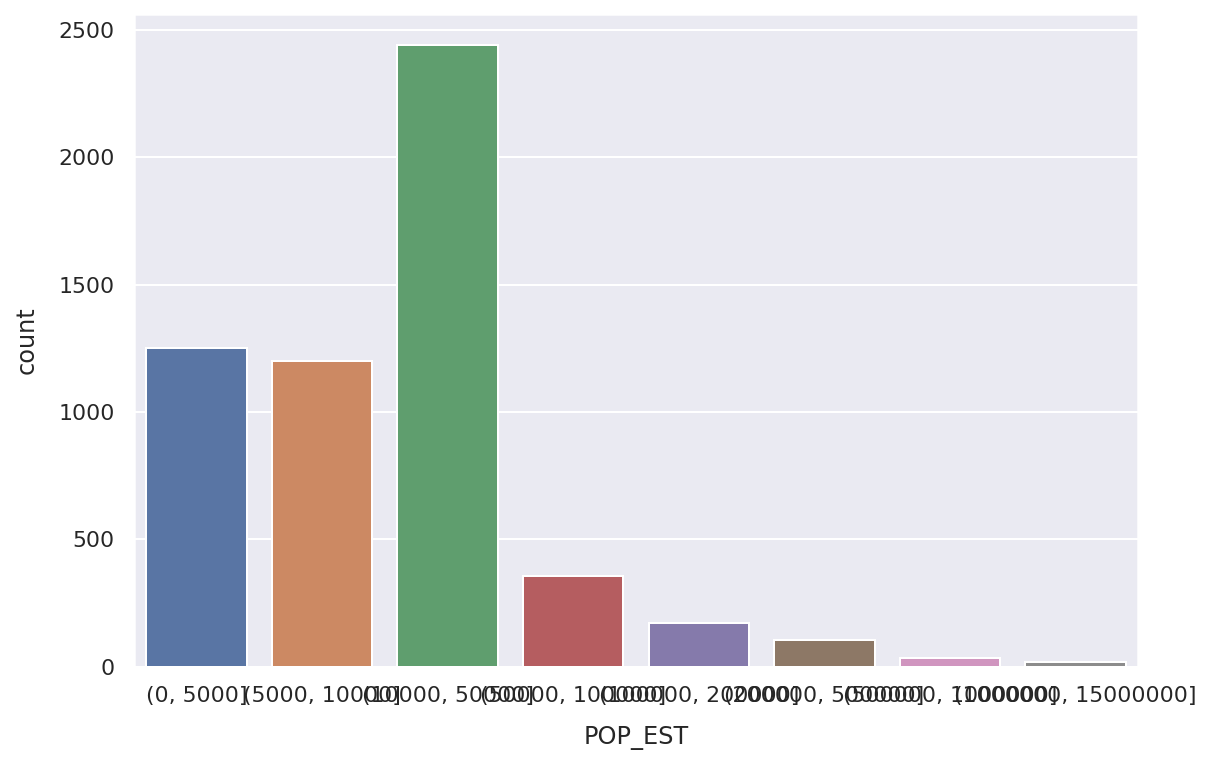

In [ ]:
# Gráfico que apresenta as quantidades de cidades com cada intervalo de população, que nos proximos gráficos será feito a quantidade 
# especialistas versus a especialidade médica que o SUS oferece
sns.countplot(data=df1,x='POP_EST');

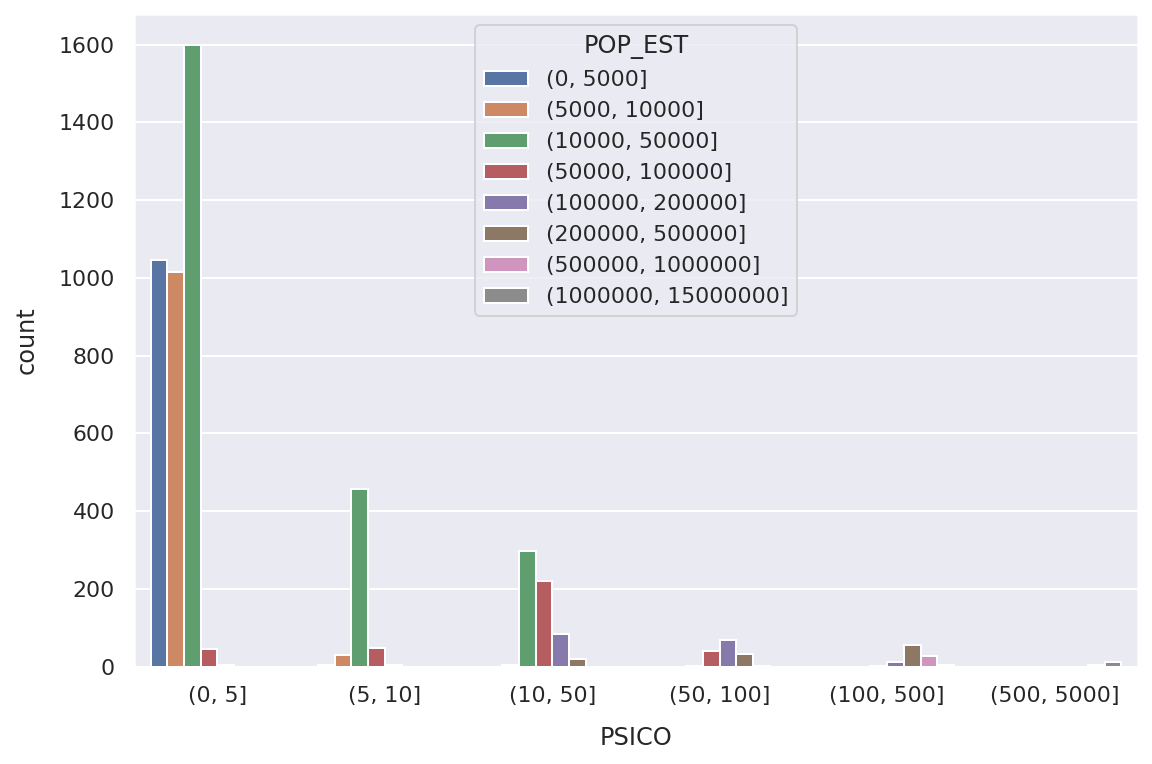

In [ ]:
# A maioria dos municipios tem até 10 psicologos na cidade, Quanto menor a estimativa da população menor a quantidade de psicologos.
sns.countplot(data=df1,x='PSICO', hue='POP_EST');

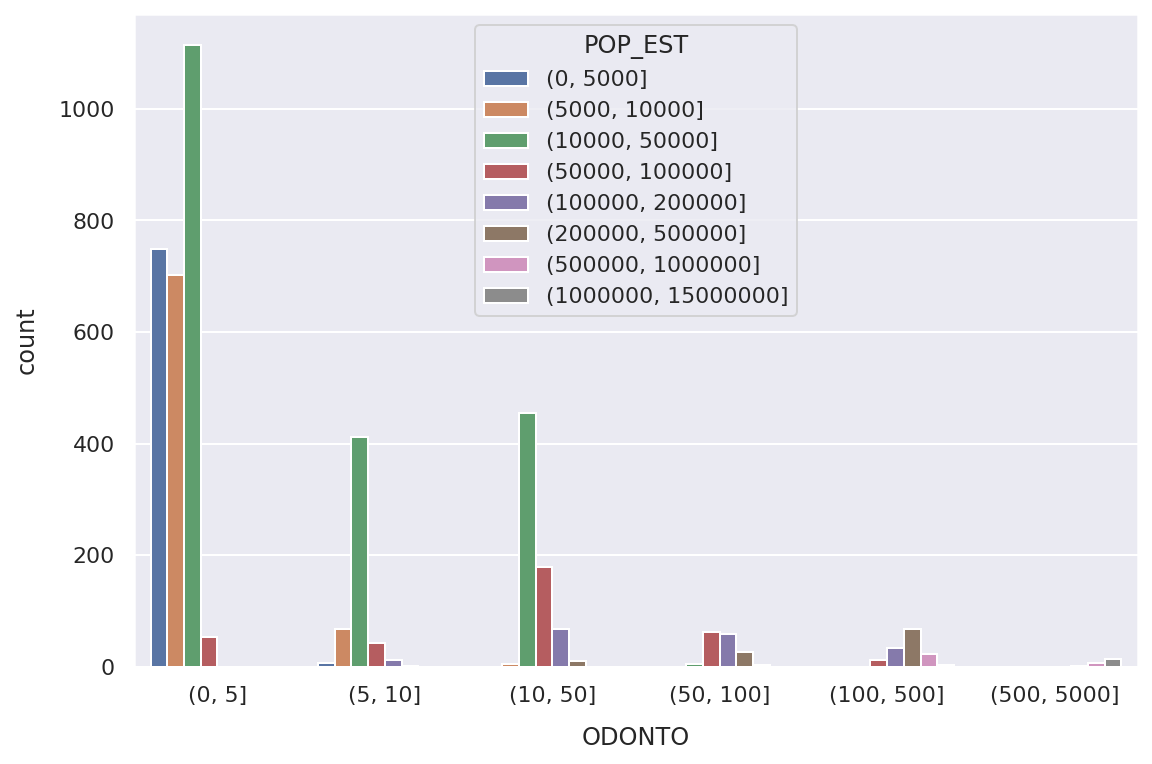

In [ ]:
sns.countplot(data=df1,x='ODONTO', hue='POP_EST');

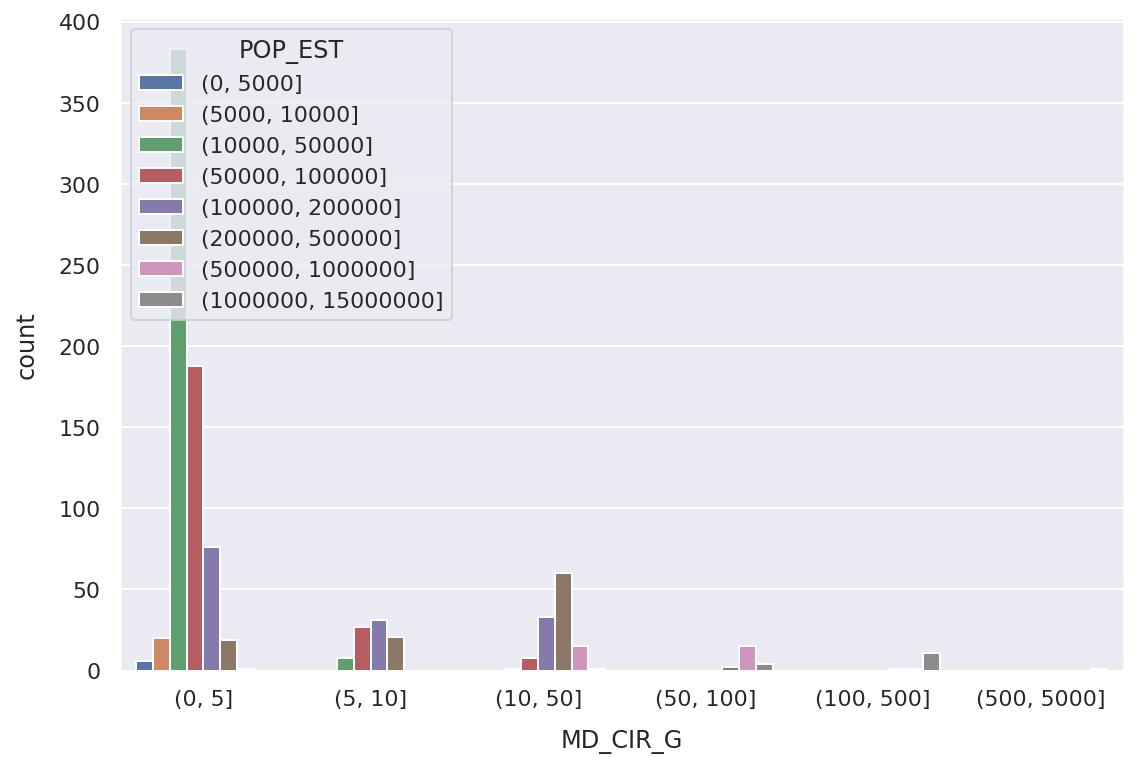

In [ ]:
sns.countplot(data=df1,x='MD_CIR_G', hue='POP_EST');

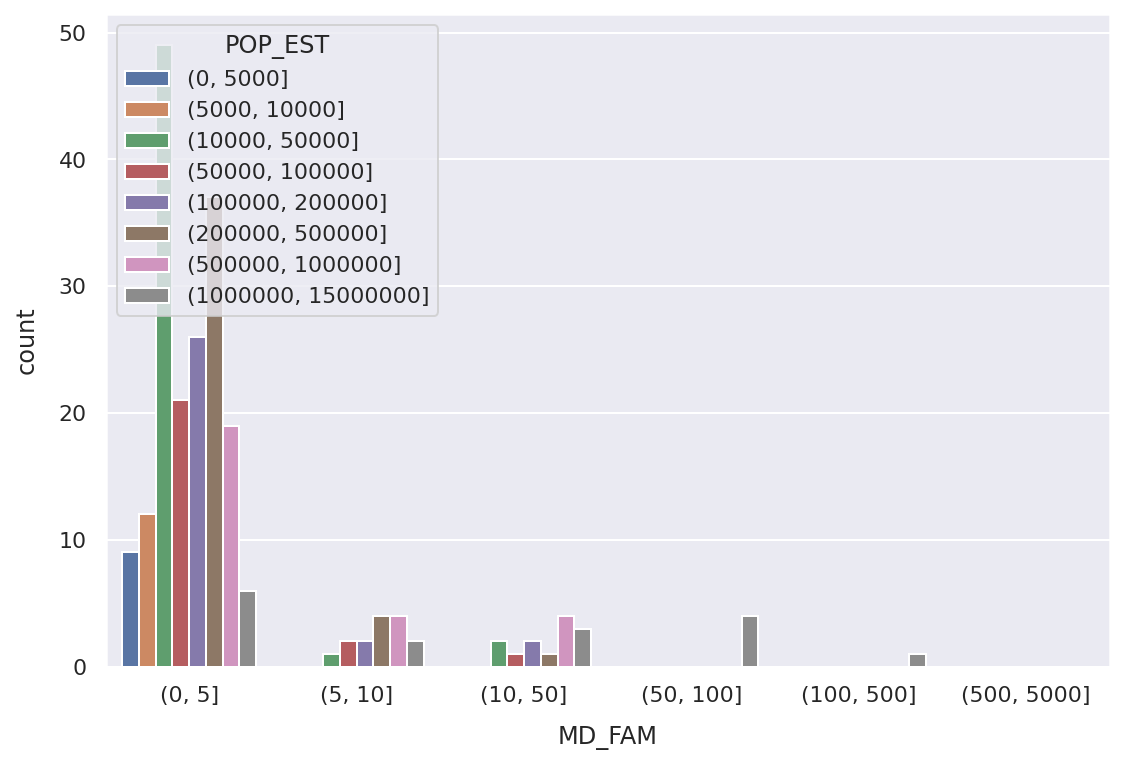

In [ ]:
# EXISTEM POUCOS MEDICOS DE FAMILIA
sns.countplot(data=df1,x='MD_FAM', hue='POP_EST');

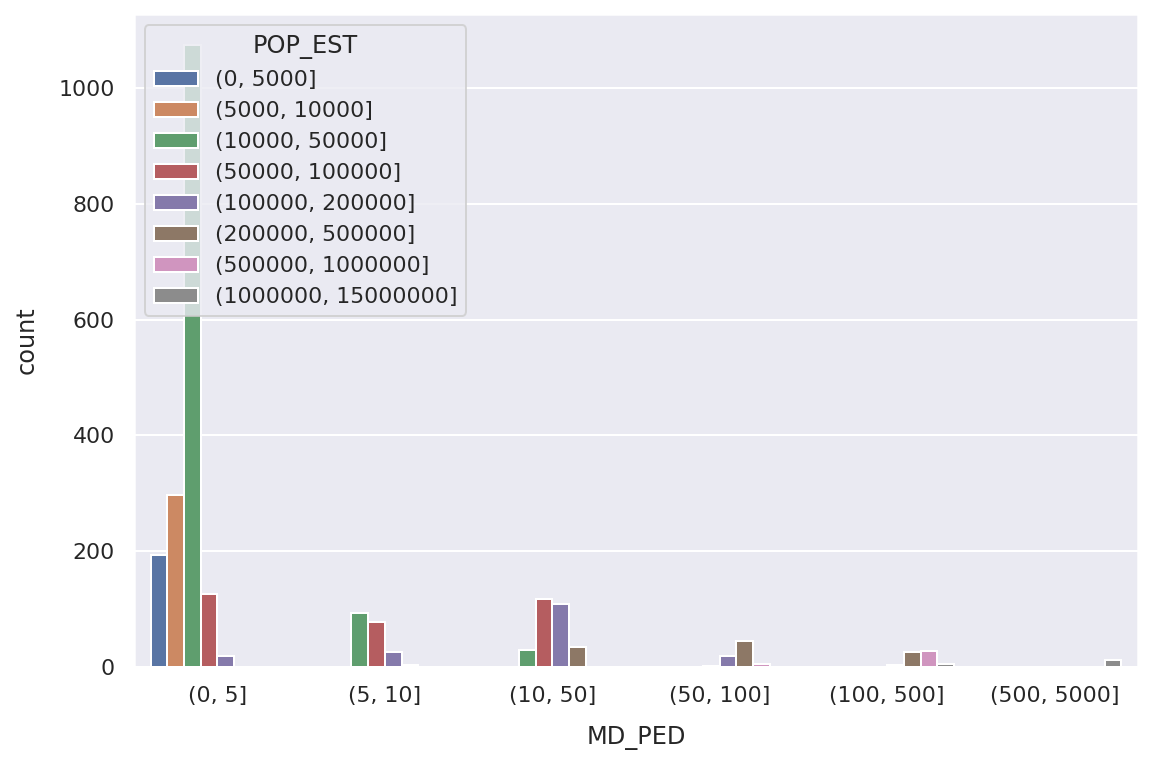

In [ ]:
sns.countplot(data=df1,x='MD_PED', hue='POP_EST');

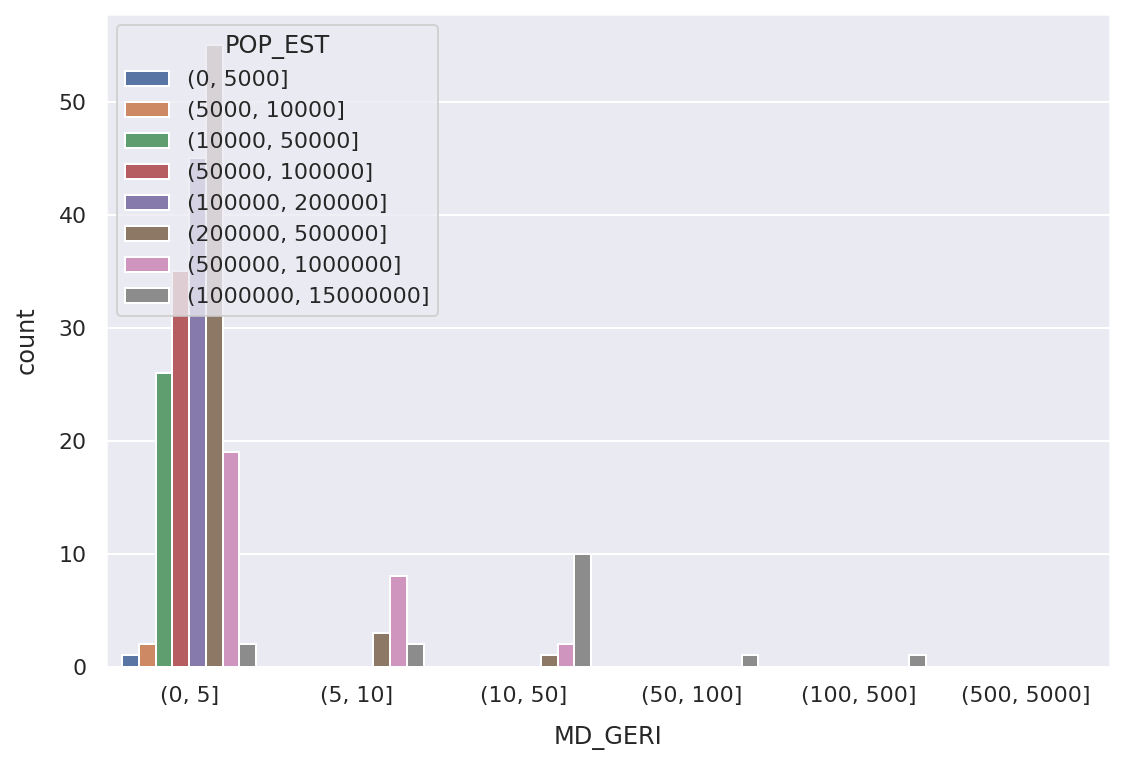

In [ ]:
sns.countplot(data=df1,x='MD_GERI', hue='POP_EST');

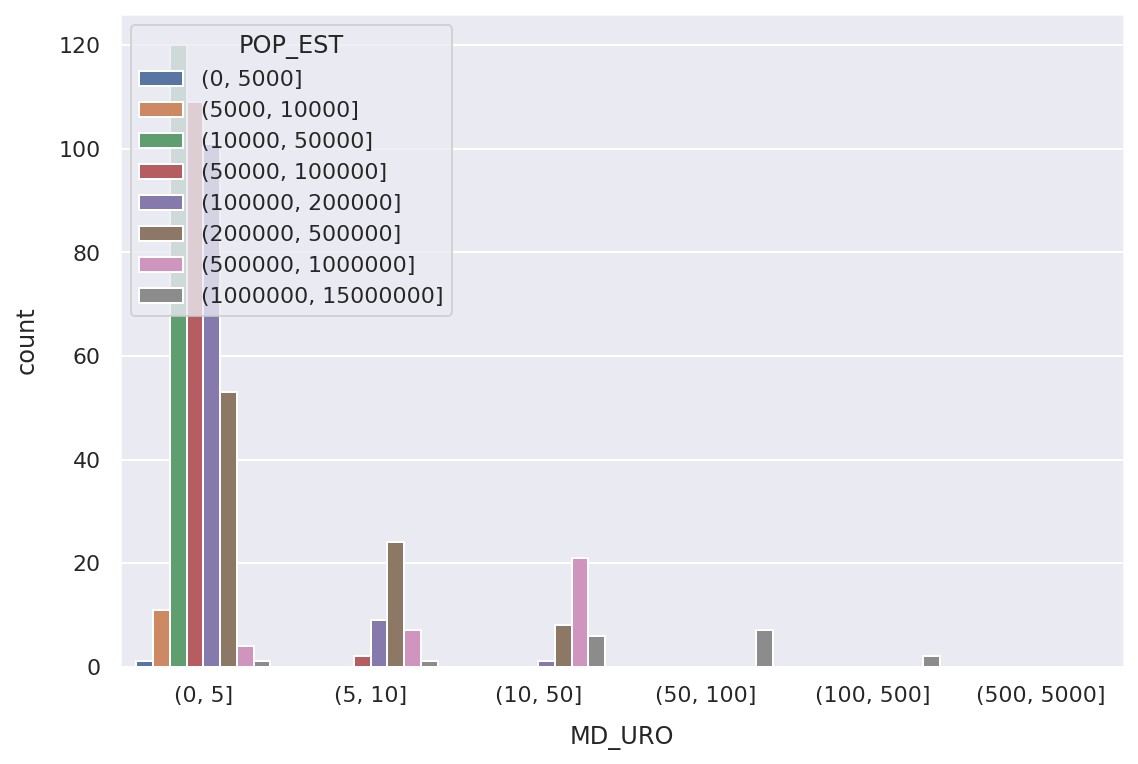

In [ ]:
sns.countplot(data=df1,x='MD_URO', hue='POP_EST');

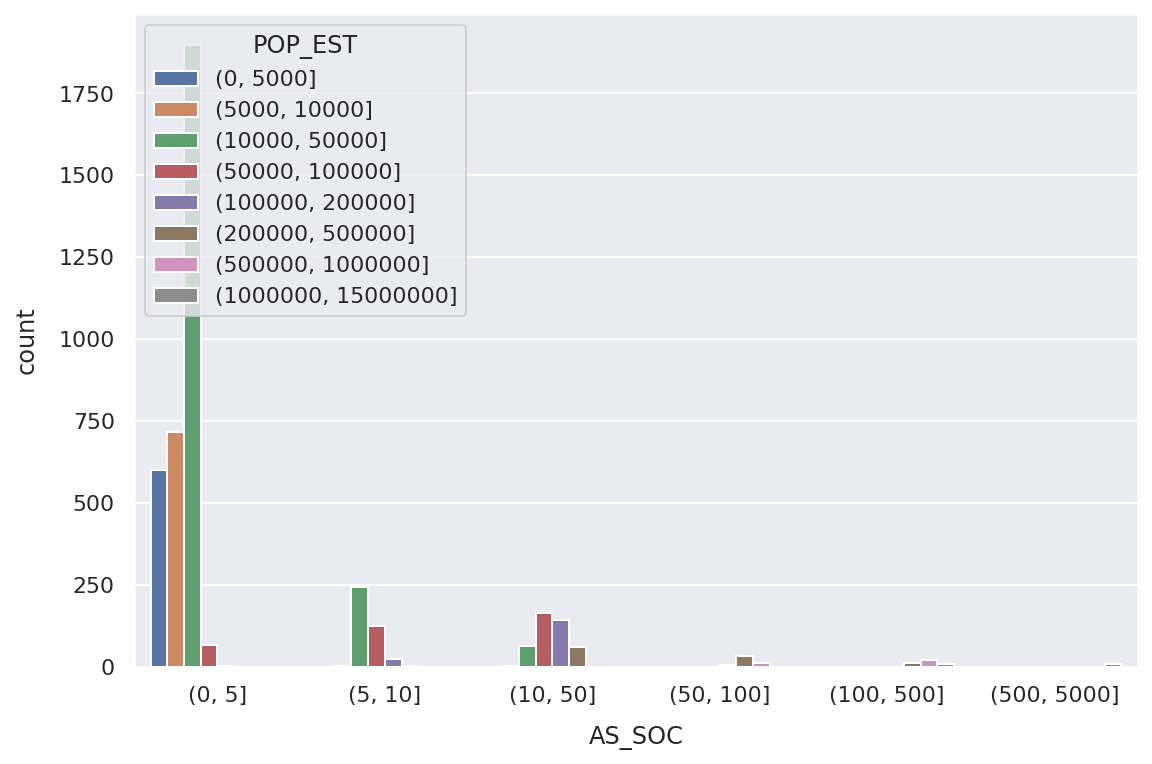

In [ ]:
sns.countplot(data=df1,x='AS_SOC', hue='POP_EST');

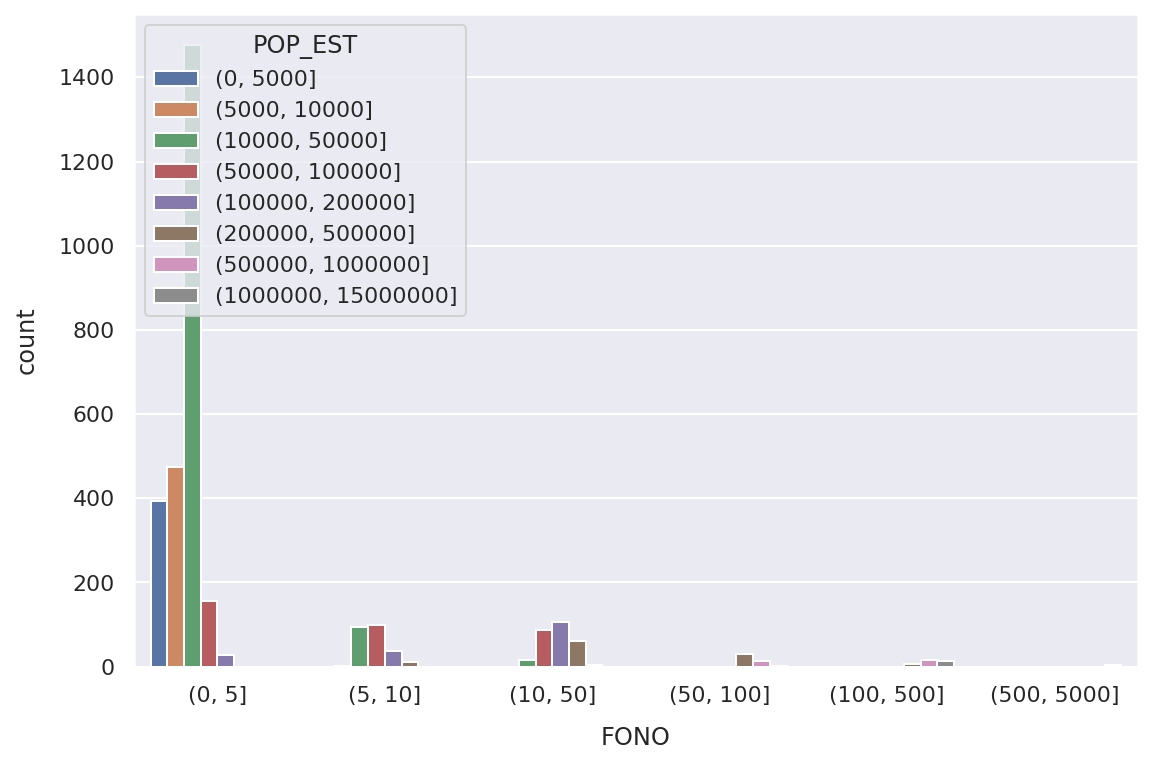

In [ ]:
sns.countplot(data=df1,x='FONO', hue='POP_EST');

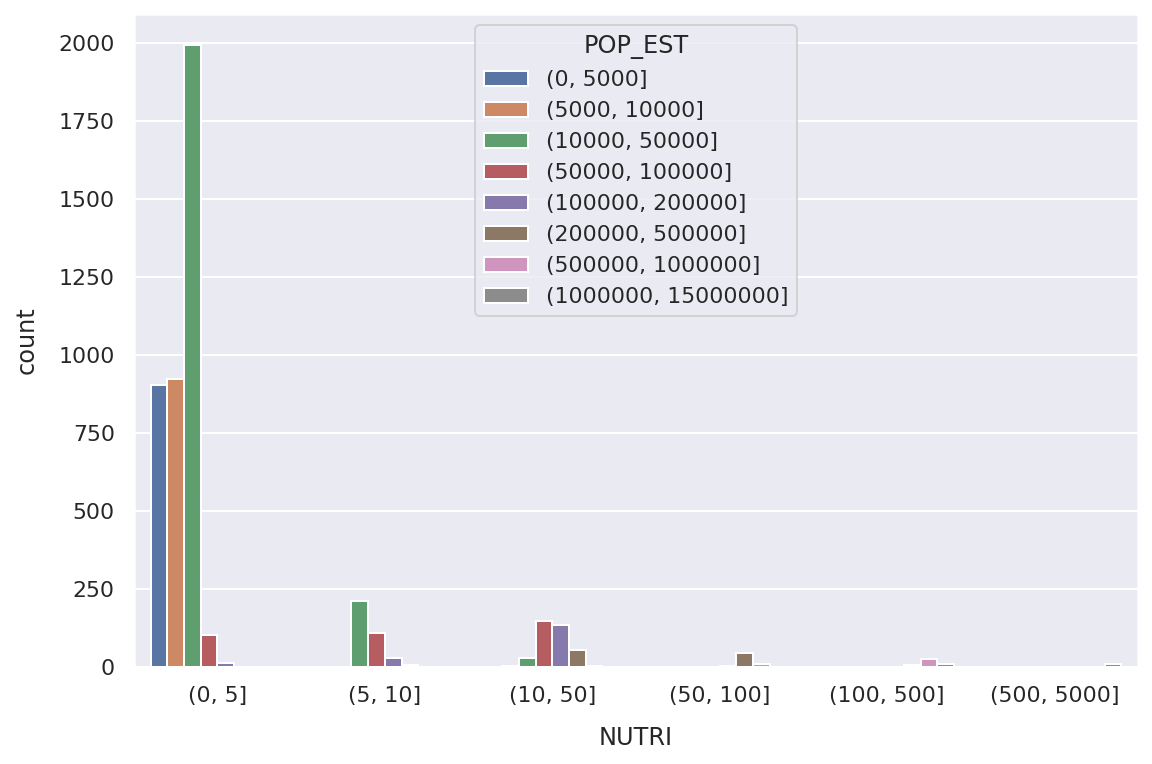

In [ ]:
sns.countplot(data=df1,x='NUTRI', hue='POP_EST');

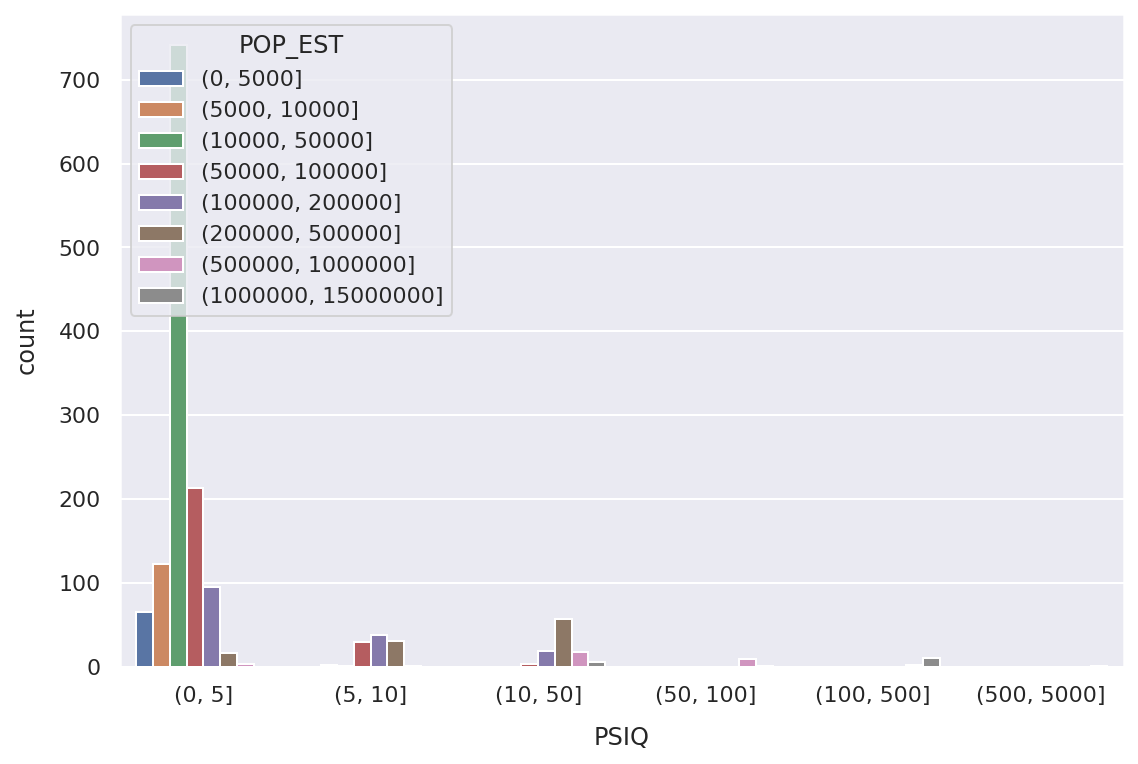

In [ ]:
sns.countplot(data=df1,x='PSIQ', hue='POP_EST');

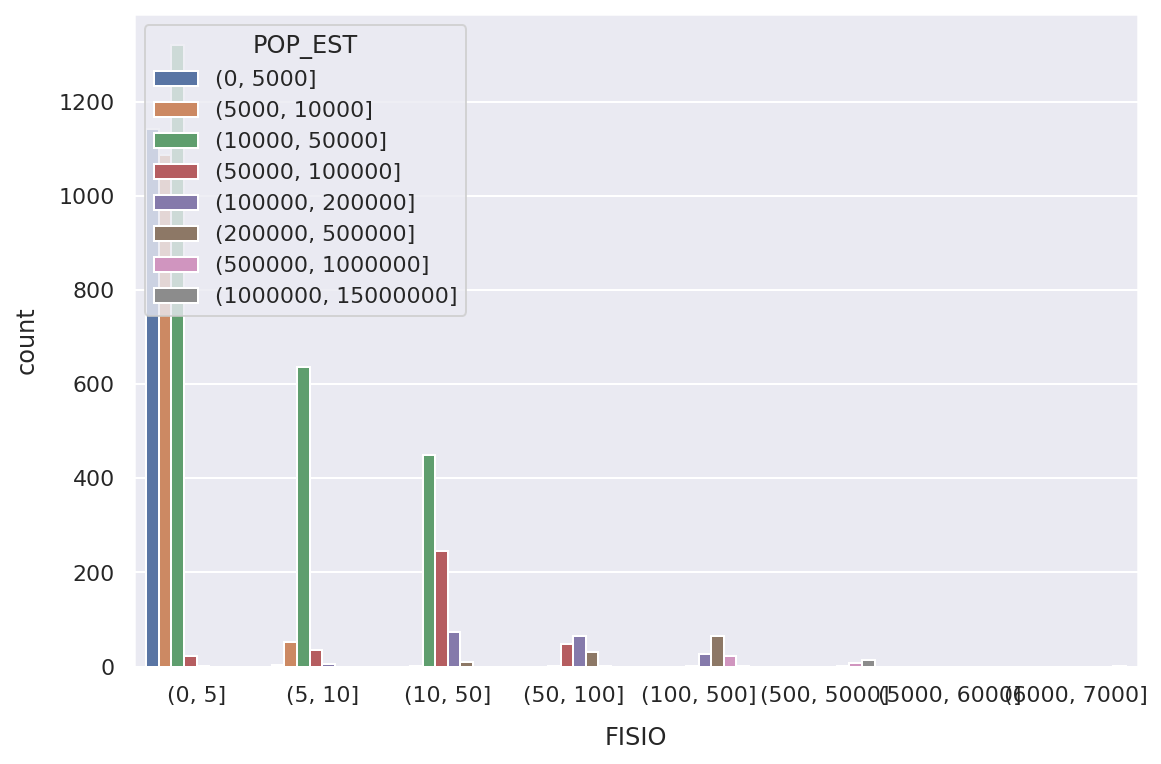

In [ ]:
sns.countplot(data=df1,x='FISIO', hue='POP_EST');

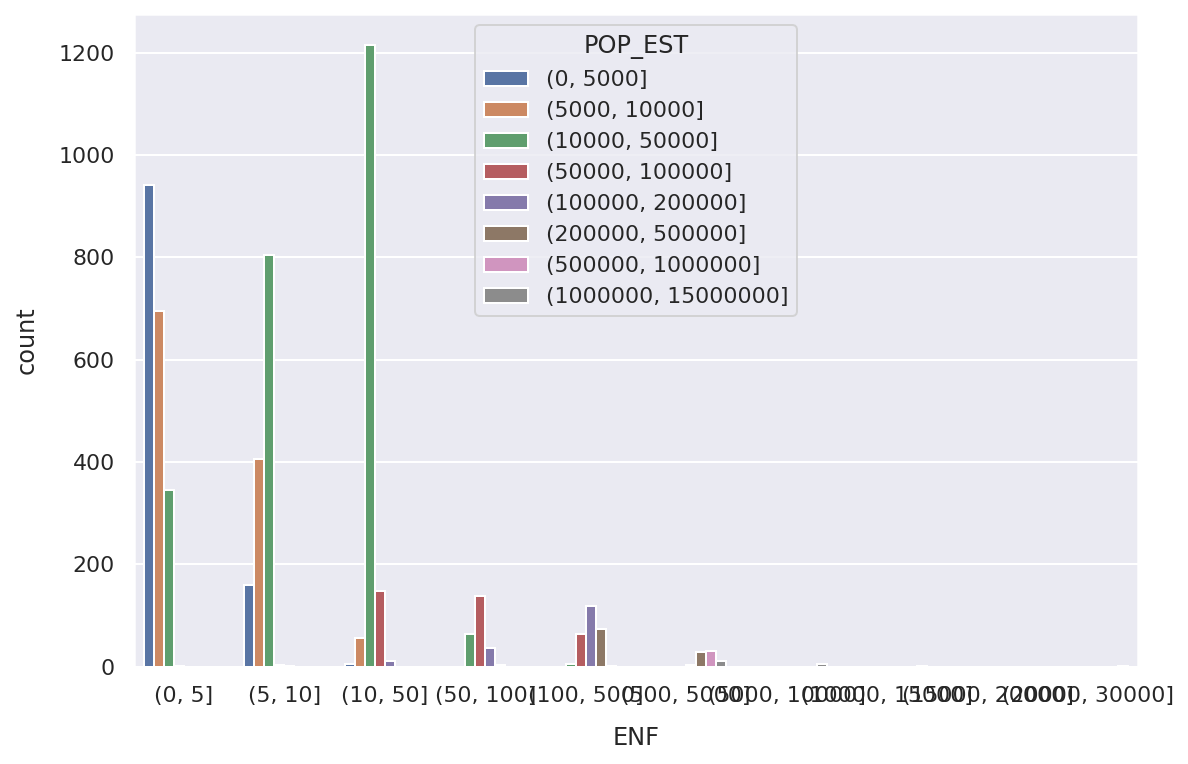

In [ ]:
sns.countplot(data=df1,x='ENF', hue='POP_EST');